# Give Me Some Credit

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

Features:
-  **SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse (*Y/N*)
-  **RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits (*percentage*)
-  **age**: Age of borrower in years (*integer*)
-  **NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years (*integer*)
-  **DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income (*percentage*)
-  **MonthlyIncome**: Monthly income (*real*)
-  **NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) (*integer*)
-  **NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due (*integer*)
-  **NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit (*integer*)
-  **NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years (*integer*)
-  **NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.) (*integer*)


In [1]:
import numpy as np
import scipy as osp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading train, validation, and test datasets

In [2]:
from sklearn.model_selection import train_test_split

def train_val_test_split(df, test_size=0.3, val_size=0.2):
    model_df, test_df = train_test_split(df, test_size=test_size)
    train_df, val_df = train_test_split(model_df, test_size=val_size)
    
    print("Shapes: train {}, validation {}, test {}".format(train_df.shape,
                                                            val_df.shape,
                                                            test_df.shape))
    
    return(model_df.copy(), train_df.copy(), val_df.copy(), test_df.copy())

In [3]:
data_df = pd.read_csv('data/cs-training.csv',
                      dtype={'SeriousDlqin2yrs': np.int8,
                             'age': np.int8,
                             'NumberOfTime30-59DaysPastDueNotWorse': np.int8,
                             'NumberOfTime60-89DaysPastDueNotWorse': np.int8,
                             'NumberOfTimes90DaysLate': np.int8,
                             'NumberOfOpenCreditLinesAndLoans': np.int8,
                             'NumberRealEstateLoansOrLines': np.int64})

data_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

model_df, train_df, val_df, test_df = train_val_test_split(data_df)

Shapes: train (84000, 11), validation (21000, 11), test (45000, 11)


In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105000 entries, 46205 to 95507
Data columns (total 11 columns):
SeriousDlqin2yrs                        105000 non-null int8
RevolvingUtilizationOfUnsecuredLines    105000 non-null float64
age                                     105000 non-null int8
NumberOfTime30-59DaysPastDueNotWorse    105000 non-null int8
DebtRatio                               105000 non-null float64
MonthlyIncome                           84195 non-null float64
NumberOfOpenCreditLinesAndLoans         105000 non-null int8
NumberOfTimes90DaysLate                 105000 non-null int8
NumberRealEstateLoansOrLines            105000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    105000 non-null int8
NumberOfDependents                      102285 non-null float64
dtypes: float64(4), int64(1), int8(6)
memory usage: 5.4 MB


In [5]:
model_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.419500e+04,105000.000000,105000.000000,105000.000000,105000.000000,102285.000000
mean,0.066095,6.442727,52.306886,0.423990,354.297480,6.678455e+03,8.452257,0.270276,1.017724,0.244838,0.757335
std,0.248450,270.492306,14.769610,4.243623,2214.541086,1.287133e+04,5.151997,4.221217,1.113669,4.206980,1.118151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029750,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.152841,52.000000,0.000000,0.366057,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.554582,63.000000,0.000000,0.863598,8.265000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,1.794060e+06,57.000000,98.000000,29.000000,98.000000,20.000000


## Default rate

In [88]:
def bar_plot_rates(rates, posplot=111, title=''):
    ax = plt.subplot(posplot)

    sns.barplot(x=rates.index,
                y=rates.values)
    ax.set_xlabel('Default')
    ax.set_ylabel('rate')
    ax.set_ylim([0, 100])
    ax.set_title(title)

    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

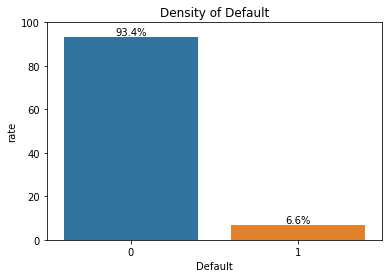

In [89]:
default_rate = 100. * model_df['SeriousDlqin2yrs'].value_counts() / model_df.shape[0]

bar_plot_rates(default_rate, title='Density of Default')
plt.show()

## Missing data analysis

In [10]:
model_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20805
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2715
dtype: int64

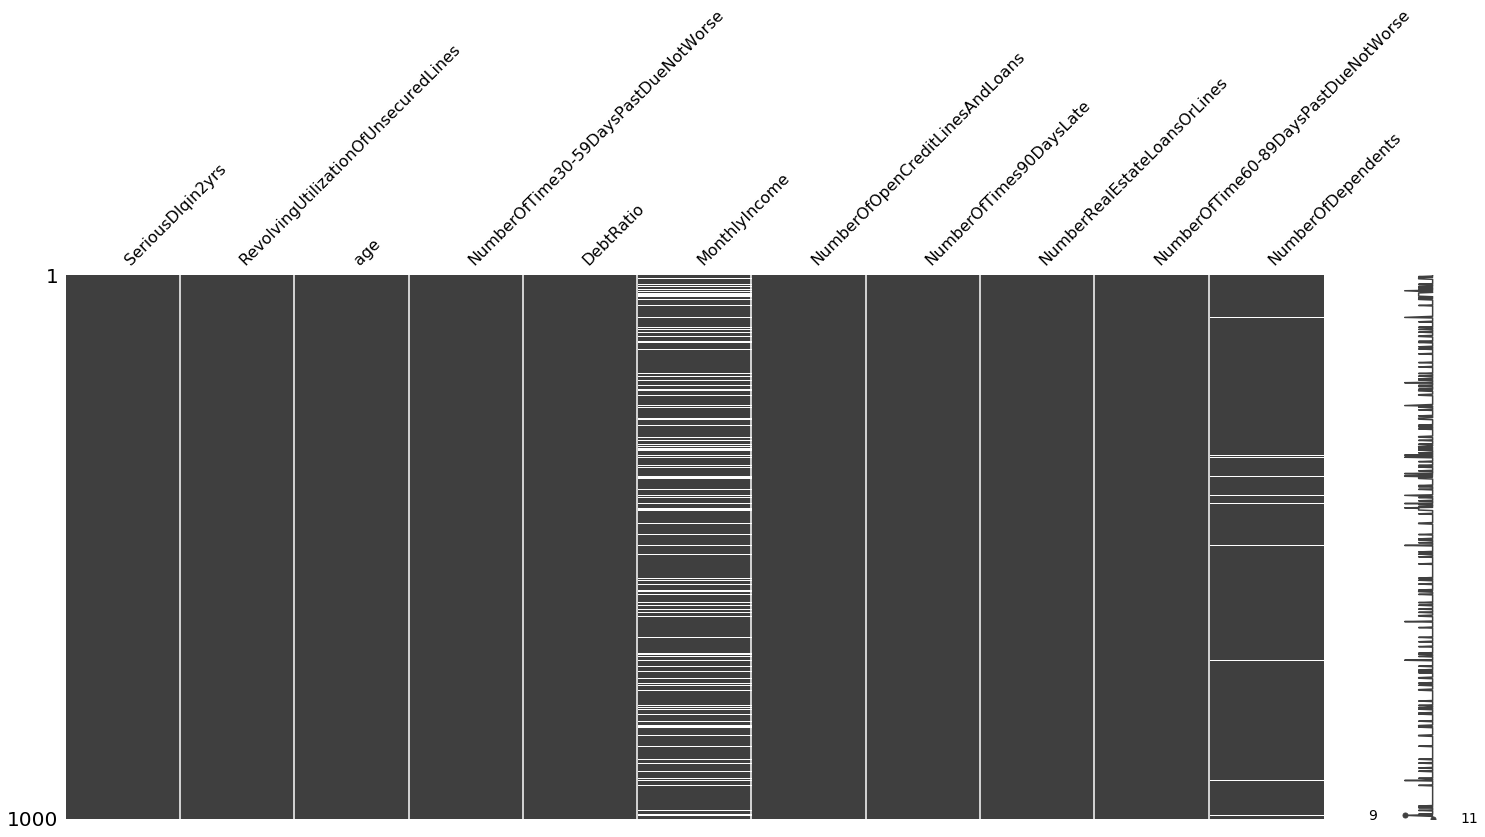

In [11]:
import missingno as msno

msno.matrix(model_df.groupby('SeriousDlqin2yrs').apply(lambda x: x.sample(n=500)))

## Feature exploration

### Age

In [14]:
model_df['age'].describe()

count    105000.000000
mean         52.306886
std          14.769610
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

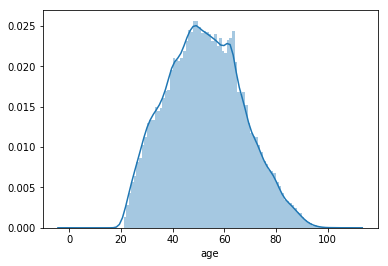

In [15]:
sns.distplot(model_df['age'], np.ptp(model_df['age']))
plt.show()

It seems a Normal distribution, let's check using the Q-Q Plot

In [16]:
def qqplot(x, **kwargs):
    ax = plt.gca()
    xr = sp.stats.probplot(x, plot=ax, fit=True)
    
    ax.get_lines()[0].set_markersize(1.0)
    ax.text(1, 0, '$Slope = {:.3}$\n$Intercept = {:.3}$\n$R² = {:.4}$'.format(*xr[1]))

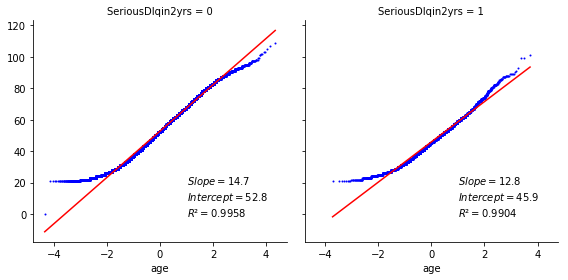

In [17]:
g = sns.FacetGrid(model_df, col="SeriousDlqin2yrs", size=4)
g.map(qqplot, "age")
plt.show()

It follows a Normal distribution.

Let's study if there are some outliers on the distribution...

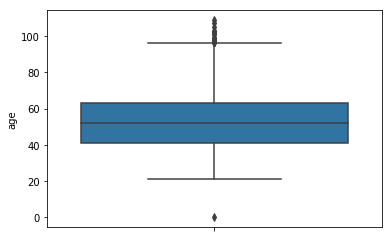

In [18]:
sns.boxplot(model_df['age'], orient='v')
plt.show()

Let's use IQR to detect outliers

In [48]:
Q1 = model_df['age'].quantile(1/4.)
Q3 = model_df['age'].quantile(3/4.)
IQR = Q3 - Q1

eta = 1.5
lower_bound = Q1 - eta * IQR
upper_bound = Q3 + eta * IQR
"bounds: ({}, {})".format(lower_bound, upper_bound)

'bounds: (8.0, 96.0)'

In [49]:
model_df.loc[(model_df['age'] < lower_bound) | (model_df['age'] > upper_bound), 'age'].value_counts()

97     12
98      5
99      4
101     3
103     2
102     2
109     1
107     1
105     1
0       1
Name: age, dtype: int64

Or, we can be more conservative using a small quantile of 0.9999 as upper bound...

In [50]:
upper_bound = model_df['age'].quantile(0.9999)
upper_bound

99.0

And set the lowes bound to 16, what seems reasonable

In [51]:
lower_bound = 16

In [52]:
model_df.loc[(model_df['age'] < lower_bound) | (model_df['age'] > upper_bound), 'age'].value_counts()

101    3
103    2
102    2
109    1
107    1
105    1
0      1
Name: age, dtype: int64

Let's see the distribution of age by default

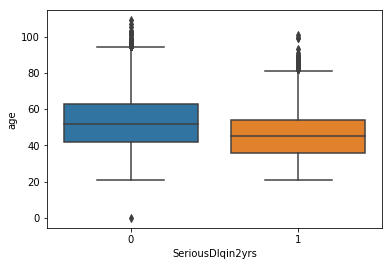

In [53]:
sns.boxplot('SeriousDlqin2yrs', 'age', data=model_df)
plt.show()

#### Conclusion

- it follows a normal distribution;
- it has no missing values;
- it should be cut [16, 99].

## NumberOfDependents

In [54]:
model_df['NumberOfDependents'].describe()

count    102285.000000
mean          0.757335
std           1.118151
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [66]:
null_ids = model_df['NumberOfDependents'].isnull()
print('Null values: total of {} rows ({:.2f}%)'.format(null_ids.sum(), null_ids.mean() * 100))

Null values: total of 2715 rows (2.59%)


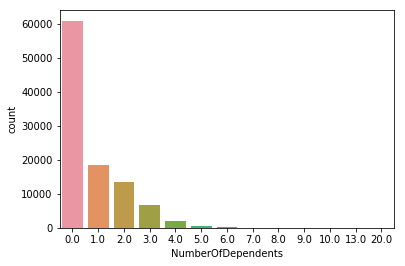

In [67]:
sns.countplot(model_df['NumberOfDependents'].dropna())
plt.show()

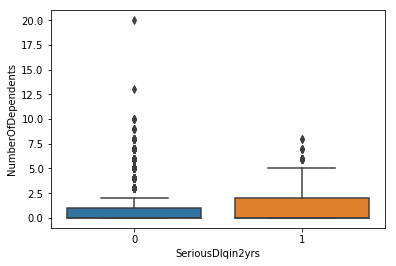

In [69]:
sns.boxplot('SeriousDlqin2yrs', 'NumberOfDependents', data=model_df)
plt.show()

#### Conclusion

- it has 2.6% of missing values;
- may fill NAs = 0.

## RevolvingUtilizationOfUnsecuredLines

In [71]:
model_df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    105000.000000
mean          6.442727
std         270.492306
min           0.000000
25%           0.029750
50%           0.152841
75%           0.554582
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [72]:
model_df['RevolvingUtilizationOfUnsecuredLines'].isnull().sum()

0

The feature RevolvingUtilizationOfUnsecuredLines is **a percentage**, so let's study if when higher than 1 brings some predictive information...

In [74]:
(model_df['RevolvingUtilizationOfUnsecuredLines'] > 1).mean()

0.02183809523809524

Only 2.28% of the rows are greater than 1. Let's see how they are distributed

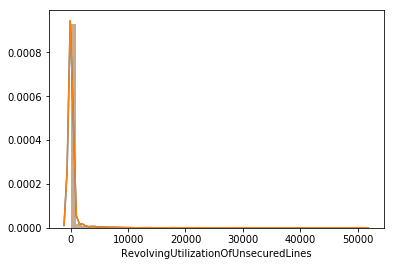

In [81]:
sns.distplot(model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] > 1]['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

Let's see if they bring some predictive information

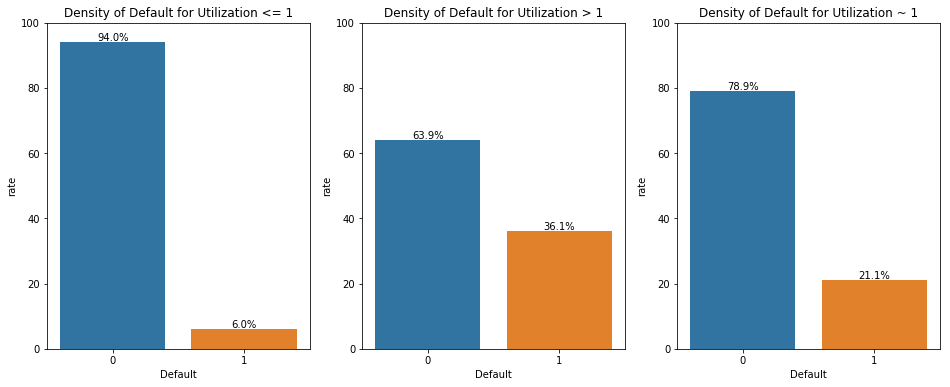

In [119]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 131, title='Density of Default for Utilization <= 1')

tmp_df = model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] > 1]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 132, title='Density of Default for Utilization > 1')

tmp_df = model_df[np.isclose(model_df['RevolvingUtilizationOfUnsecuredLines'], 1, atol=0.1)]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 133, title='Density of Default for Utilization ~ 1')

plt.show()

Let's see the distribution without the values higher than 1.

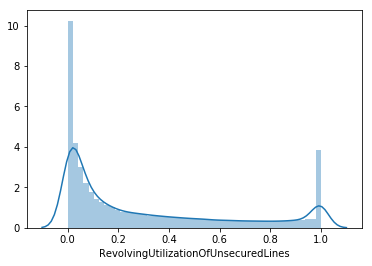

In [120]:
sns.distplot(model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1]['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

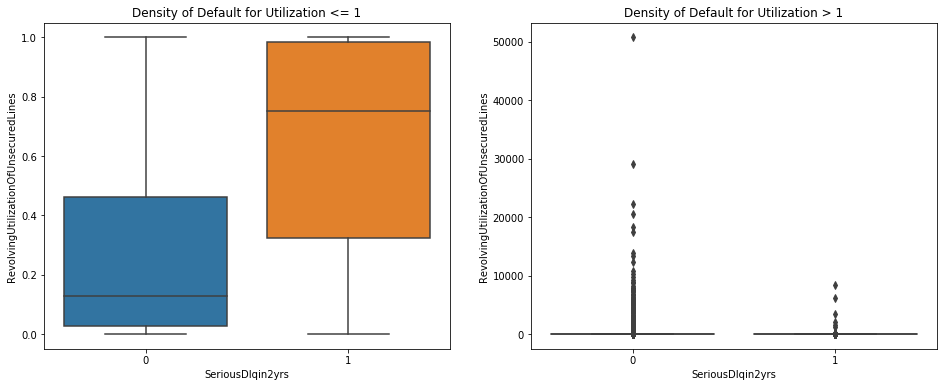

In [110]:
plt.figure(figsize=(16, 6))

ax = plt.subplot(121)
sns.boxplot('SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
            data=model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1])
ax.set_title('Density of Default for Utilization <= 1')

ax = plt.subplot(122)
sns.boxplot('SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
            data=model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] > 1])

ax.set_title('Density of Default for Utilization > 1')

plt.show()

#### Conclusion

- it has no missing values;
- values higher than 1 should be preserved somehow.

## NumberOfOpenCreditLinesAndLoans

In [122]:
model_df['NumberOfOpenCreditLinesAndLoans'].describe()

count    105000.000000
mean          8.452257
std           5.151997
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          57.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [123]:
model_df['NumberOfOpenCreditLinesAndLoans'].isnull().sum()

0

Let's see the distribution of data

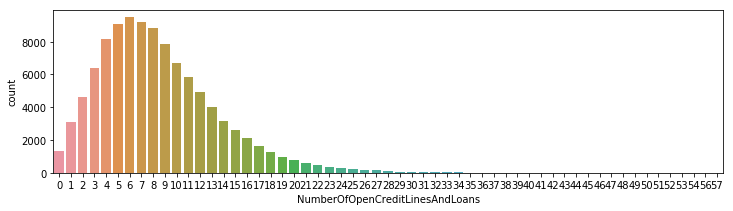

In [124]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(model_df['NumberOfOpenCreditLinesAndLoans'])
plt.show()

It seems it have a long tail...

In [125]:
model_df['NumberOfOpenCreditLinesAndLoans'].value_counts(sort=False).tail(10)

47    2
48    5
49    2
50    2
51    1
52    2
53    1
54    3
56    1
57    2
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

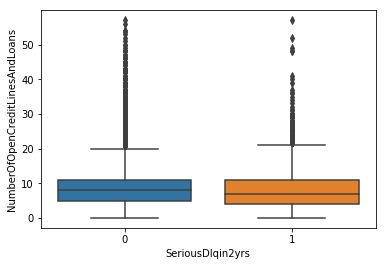

In [126]:
sns.boxplot('SeriousDlqin2yrs', 'NumberOfOpenCreditLinesAndLoans', data=model_df)
plt.show()

#### Conclusion

-  No missing values;
-  It is OK.

## NumberRealEstateLoansOrLines

In [128]:
model_df['NumberRealEstateLoansOrLines'].describe()

count    105000.000000
mean          1.017724
std           1.113669
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          29.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [129]:
model_df['NumberRealEstateLoansOrLines'].isnull().sum()

0

Let's see the distribution of data

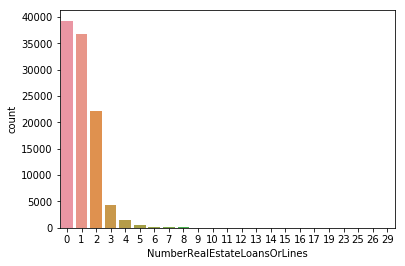

In [130]:
sns.countplot(model_df['NumberRealEstateLoansOrLines'])
plt.show()

It seems it have a long tail...

In [131]:
model_df['NumberRealEstateLoansOrLines'].value_counts(sort=False).tail(10)

13    13
14     5
15     5
16     4
17     1
19     1
23     1
25     1
26     1
29     1
Name: NumberRealEstateLoansOrLines, dtype: int64

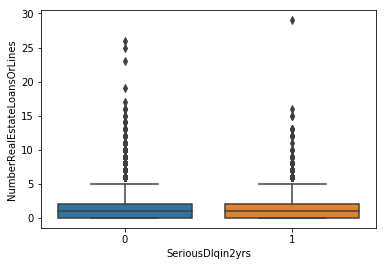

In [133]:
sns.boxplot('SeriousDlqin2yrs', 'NumberRealEstateLoansOrLines', data=model_df)
plt.show()

#### Conclusion

-  No missing values;
-  Just drop values NumberRealEstateLoansOrLines > 19.

## NumberOfTime30–59DaysPastDueNotWorse

In [135]:
model_df['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    105000.000000
mean          0.423990
std           4.243623
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [136]:
model_df['NumberOfTime30-59DaysPastDueNotWorse'].isnull().sum()

0

Let's see the distribution of data

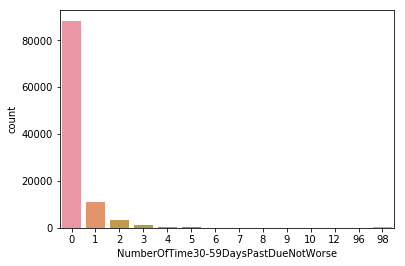

In [137]:
sns.countplot(model_df['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()

In [166]:
print('Number of flagged rows: {:.2f}%'.format((model_df['NumberOfTime30-59DaysPastDueNotWorse'] >= 96).mean() * 100))

Number of flagged rows: 0.18%


The values 96 and 98 seems very unusual... Let's see if those 'flags' show something on the data

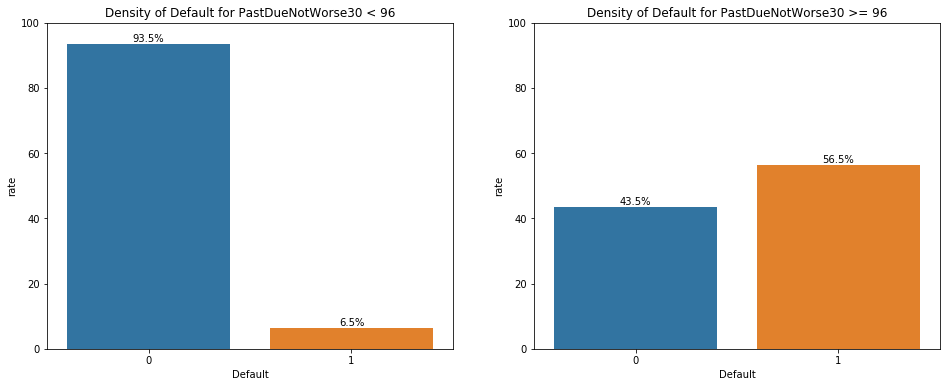

In [146]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 121, title='Density of Default for PastDueNotWorse30 < 96')

tmp_df = model_df[model_df['NumberOfTime30-59DaysPastDueNotWorse'] >= 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 122, title='Density of Default for PastDueNotWorse30 >= 96')

plt.show()

#### Conclusion

-  No missing values;
-  Flags 96 and 98 bring some predictive information.

## NumberOfTime60-89DaysPastDueNotWorse

In [143]:
model_df['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    105000.000000
mean          0.244838
std           4.206980
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [144]:
model_df['NumberOfTime60-89DaysPastDueNotWorse'].isnull().sum()

0

Let's see the distribution of data

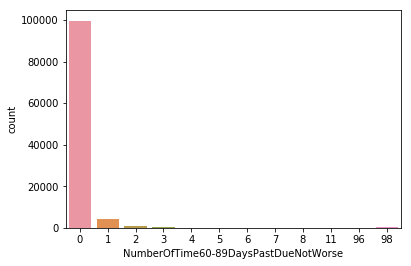

In [145]:
sns.countplot(model_df['NumberOfTime60-89DaysPastDueNotWorse'])
plt.show()

In [165]:
print('Number of flagged rows: {:.2f}%'.format((model_df['NumberOfTime60-89DaysPastDueNotWorse'] >= 96).mean() * 100))

Number of flagged rows: 0.18%


The values 96 and 98 seems very unusual... Let's see if those 'flags' show something on the data

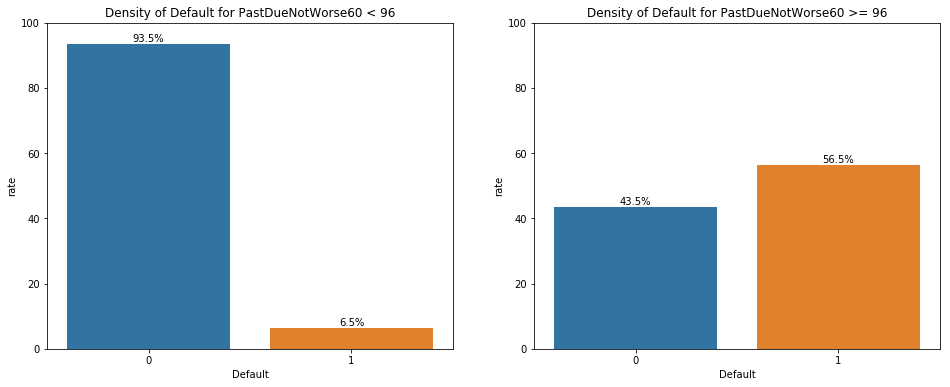

In [149]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['NumberOfTime60-89DaysPastDueNotWorse'] < 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 121, title='Density of Default for PastDueNotWorse60 < 96')

tmp_df = model_df[model_df['NumberOfTime60-89DaysPastDueNotWorse'] >= 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 122, title='Density of Default for PastDueNotWorse60 >= 96')

plt.show()

#### Conclusion

-  No missing values;
-  Flags 96 and 98 bring some predictive information.

## NumberOfTimes90DaysLate

In [150]:
model_df['NumberOfTimes90DaysLate'].describe()

count    105000.000000
mean          0.270276
std           4.221217
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [151]:
model_df['NumberOfTimes90DaysLate'].isnull().sum()

0

Let's see the distribution of data

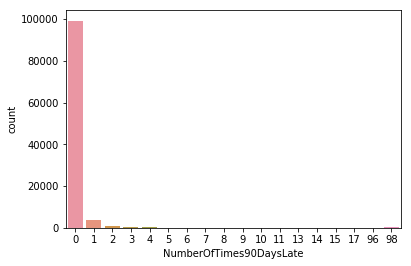

In [152]:
sns.countplot(model_df['NumberOfTimes90DaysLate'])
plt.show()

The values 96 and 98 seems very unusual... Let's see if those 'flags' show something on the data

In [168]:
print('Number of flagged rows: {:.2f}%'.format((model_df['NumberOfTimes90DaysLate'] >= 96).mean() * 100))

Number of flagged rows: 0.18%


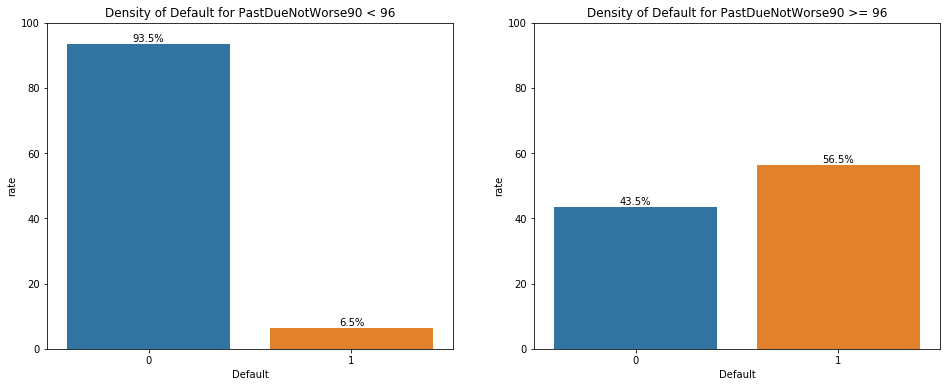

In [153]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['NumberOfTimes90DaysLate'] < 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 121, title='Density of Default for PastDueNotWorse90 < 96')

tmp_df = model_df[model_df['NumberOfTimes90DaysLate'] >= 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 122, title='Density of Default for PastDueNotWorse90 >= 96')

plt.show()

#### Conclusion

-  No missing values;
-  Flags 96 and 98 bring some predictive information.

In [198]:
a = model_df['NumberOfTime30-59DaysPastDueNotWorse'] >= 96
b = model_df['NumberOfTime60-89DaysPastDueNotWorse'] >= 96
c = model_df['NumberOfTimes90DaysLate'] >= 96

print('Total of rows that are flagged in every column: {}'.format((a | b | c).sum()))

Total of rows that are flagged in every column: 193


## MonthlyIncome

In [199]:
model_df['MonthlyIncome'].describe()

count    8.419500e+04
mean     6.678455e+03
std      1.287133e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.265000e+03
max      1.794060e+06
Name: MonthlyIncome, dtype: float64

In [200]:
null_ids = model_df['MonthlyIncome'].isnull()
print('Null values: total of {} rows ({:.2f}%)'.format(null_ids.sum(), null_ids.mean() * 100))

Null values: total of 20805 rows (19.81%)


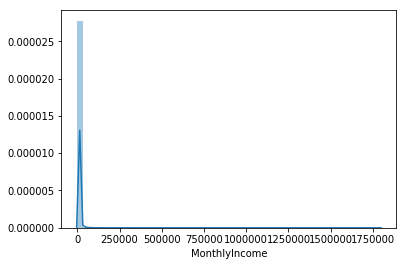

In [201]:
sns.distplot(model_df['MonthlyIncome'].dropna())
plt.show()

Let's transform this variable using Box-Cox (only applicable to positive values)

In [202]:
xt, lmbda = sp.stats.boxcox(model_df[model_df['MonthlyIncome'] > 0]['MonthlyIncome'])

In [233]:
lmbda

0.26979020831658307

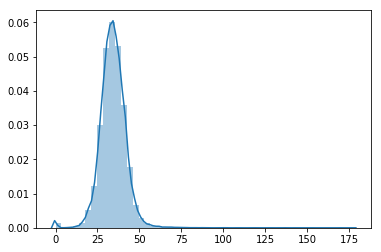

In [203]:
sns.distplot(xt)
plt.show()

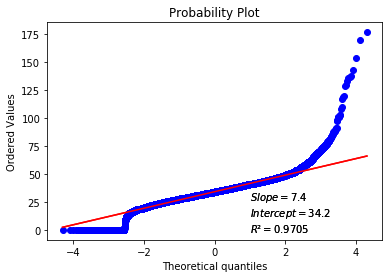

In [205]:
qqplot(xt)
plt.show()

It has long tails...

In [216]:
model_df['MonthlyIncomeBoxCox'] = 0
model_df.loc[model_df['MonthlyIncome'] > 0, 'MonthlyIncomeBoxCox'] = xt

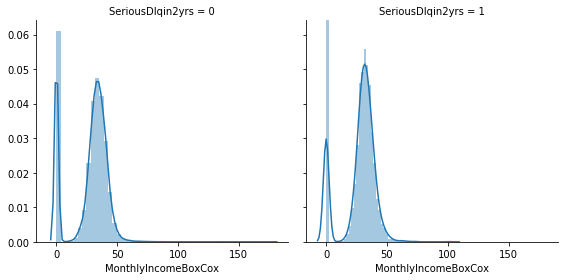

In [218]:
g = sns.FacetGrid(model_df, col="SeriousDlqin2yrs", size=4)
g.map(sns.distplot, "MonthlyIncomeBoxCox")
plt.show()

#### Conclusion

-  20% of the values are missing;
-  The variable may be transformed by Box-Cox and becomes a bell-shaped distribution.

## DebtRatio

In [219]:
model_df['DebtRatio'].describe()

count    105000.000000
mean        354.297480
std        2214.541086
min           0.000000
25%           0.175074
50%           0.366057
75%           0.863598
max      329664.000000
Name: DebtRatio, dtype: float64

In [220]:
model_df['DebtRatio'].isnull().sum()

0

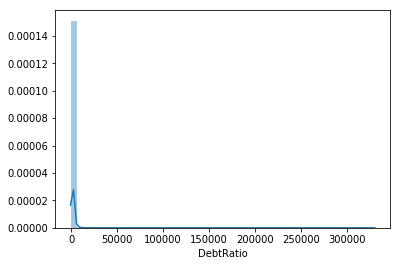

In [221]:
sns.distplot(model_df['DebtRatio'])
plt.show()

It is a ratio, so let's study the values greater than 24 -- two years of debts

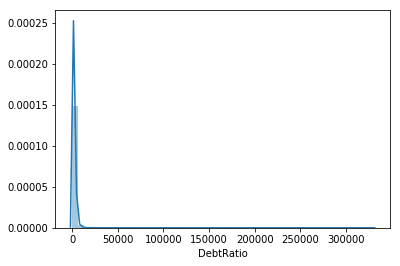

In [225]:
sns.distplot(model_df[model_df['DebtRatio'] > 24]['DebtRatio'])
plt.show()

In [228]:
xt, lmbda2 = sp.stats.boxcox(model_df[model_df['DebtRatio'] > 0]['DebtRatio'])

In [232]:
lmbda2

-0.11515202696713417

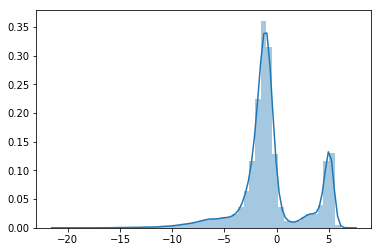

In [229]:
sns.distplot(xt)
plt.show()

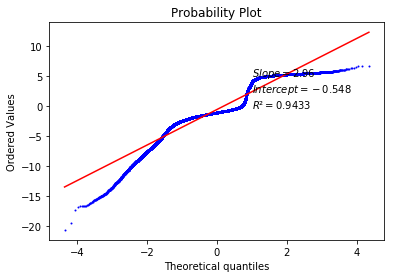

In [234]:
qqplot(xt)
plt.show()

It has long tails

In [ ]:
model_df['DebtRatioBoxCox'] = 0
model_df.loc[model_df['DebtRatio'] > 0, 'DebtRatioBoxCox'] = xt

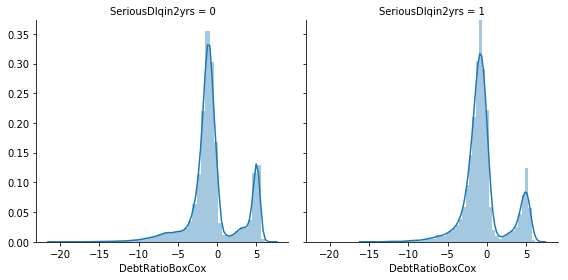

In [231]:
g = sns.FacetGrid(model_df, col="SeriousDlqin2yrs", size=4)
g.map(sns.distplot, "DebtRatioBoxCox")
plt.show()

#### Conclusion

-  No missing values;
-  The variable may be transformed by Box-Cox and becomes a bell-shaped distribution.